In [1]:
##importing Dependencies
import pyforest as pf
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model  import Lasso
from sklearn import metrics


# Data collection and Processing

In [2]:
car_dataset=pd.read_csv('carsdata.csv')    

<IPython.core.display.Javascript object>

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
##checking no of rows and cols

car_dataset.shape

(301, 9)

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#for checking no of null values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
car_dataset['Fuel_Type'].unique() 

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

<IPython.core.display.Javascript object>

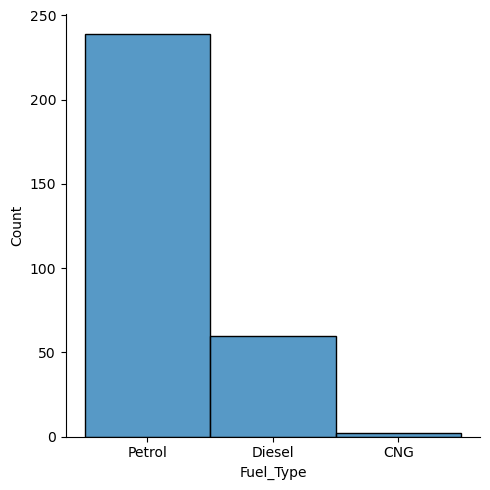

In [8]:
sns.displot(car_dataset['Fuel_Type'])

In [9]:
#for checking the distribution of catagorial data

In [10]:
print(car_dataset.Fuel_Type.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [11]:
print(car_dataset.Seller_Type.value_counts())


Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [12]:
print(car_dataset.Transmission.value_counts())


Manual       261
Automatic     40
Name: Transmission, dtype: int64


# ML cant understand text we will change the text to 0 /1

In [13]:
##Encoding catagoerical data

In [14]:
##encoding "Fuel_Type" coloumn

##changed the values to 1,0,2
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,"CNG":2}},inplace=True)

car_dataset.head()

In [15]:
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [16]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# #Split data

In [17]:
##Here we dropped put the coloumns which were not required
x=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']

In [18]:
x.dtypes

Year               int64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int64
Seller_Type        int64
Transmission       int64
Owner              int64
dtype: object

In [19]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# spiliting training and test data

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1,random_state=2)

# Model Training

In [21]:
##Linear Regression

lin_reg_model=LinearRegression()


In [22]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [23]:
##Prediction on Training data

training_data_prediction = lin_reg_model.predict(X_train)

In [24]:
##R2 error that we would be using

error_score=metrics.r2_score(Y_train,training_data_prediction)

In [25]:
print(error_score)

0.8799451660493705


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

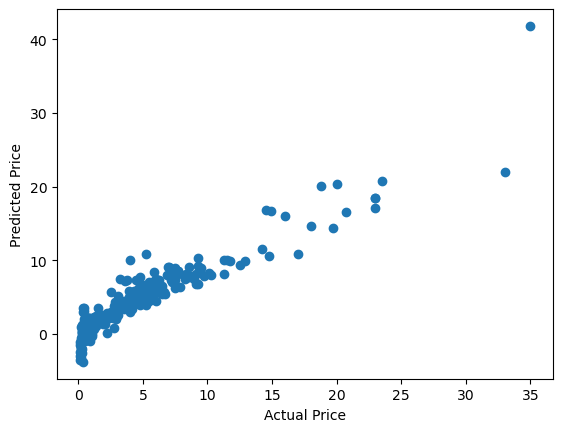

In [26]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [27]:
##now test our model

In [28]:
test_data_prediction = lin_reg_model.predict(X_test)

In [29]:

error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared value: ",error_score)

R squared value:  0.836576671502687


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

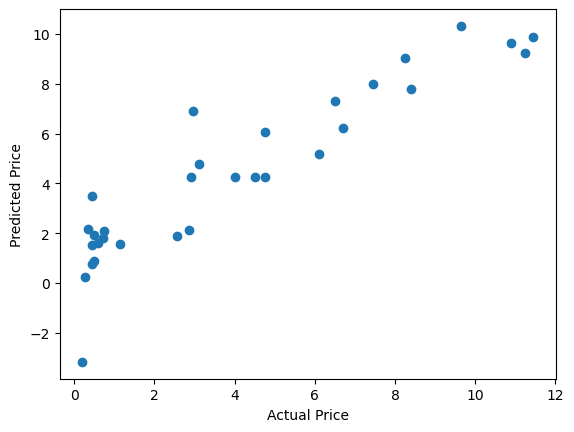

In [32]:
 plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [31]:
 ##Now we use Lasso regression 
    
    